In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

In [2]:
para= {
    "ip_port_file":r"H:\test_data\input\meb\ip_port.txt",
    "local_binary_dir":"O:/data/mdfs",
    "local_sta_dir": "O:/data/sta",
    "local_grid_dir":"O:/data/grid",
    "max_save_day":7,
    }
grid0 = meb.grid([70,140,1],[15,55,1])

In [3]:
dir_ob_tmin = "SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/YYYYMMDDHH0000.000"
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
station_alt = meb.read_station(meb.station_国家站)
station = station_alt.copy()
station["data0"] = meb.IV
station = meb.in_grid_xy(station,grid0)
id_dict = {"北京":54511,"哈尔滨":50953, "武汉":57494,"广州":59287}
id_list = []
for key in id_dict.keys():
    id_list.append(id_dict[key])
station_city = meb.in_id_list(station,id_list)
veri_day_count = 7
week_ago = today - datetime.timedelta(days = veri_day_count)
tweek_ago = week_ago -  datetime.timedelta(days = veri_day_count)

In [4]:
#读取观测的24小时最高温
dir_ob_tmax = "SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/YYYYMMDDHH0000.000"
ob_tmax_list = []
time2 = week_ago
while time2 <= now:
    sta_max = None
    for i in range(-23,1,1):
        time_ob = time2 + datetime.timedelta(hours = i)
        path = meb.tool.path_tools.get_path(dir_ob_tmax,time_ob)
        sta = mpd.application.read_stadata(para,path,station = station)
        sta_max = meb.fun.computing.max_on_id(sta_max,sta)
    if sta_max is not None:
        meb.set_stadata_coords(sta_max,time = time2,dtime = 0,level = 0)
        meb.set_stadata_names(sta_max,["ob"])
        ob_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
ob_tmax_all = pd.concat(ob_tmax_list,axis = 0)

#读取观测的24小时最低温
dir_ob_tmin = "SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/YYYYMMDDHH0000.000"
ob_tmin_list = []
time2 = week_ago
while time2 <= now:
    sta_min = None
    for i in range(-23,1,1):
        time_ob = time2 + datetime.timedelta(hours = i)
        path = meb.tool.path_tools.get_path(dir_ob_tmin,time_ob)
        sta = mpd.application.read_stadata(para,path,station = station)
        sta_min = meb.fun.computing.min_on_id(sta_min,sta)
    if sta_min is not None:
        meb.set_stadata_coords(sta_min,time = time2,dtime = 0,level = 0)
        meb.set_stadata_names(sta_min,["ob"])
        ob_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
ob_tmin_all = pd.concat(ob_tmin_list,axis = 0)


#读取ECMWF最低温
dir_scmoc = r"ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\YYMMDDHH.TTT"
ec_tmin_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_min = None
        for i in range(-18,1,6):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_min = meb.fun.computing.min_on_id(sta_min,sta)
        if sta_min is not None:
            meb.set_stadata_coords(sta_min,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["ecmwf"])
            ec_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
ec_tmin_all = pd.concat(ec_tmin_list,axis = 0)

#读取ECMWF最高温
dir_scmoc = r"ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\YYMMDDHH.TTT"
ec_tmax_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_max = None
        for i in range(-18,1,6):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_max = meb.fun.computing.max_on_id(sta_max,sta)
        if sta_max is not None:
            meb.set_stadata_coords(sta_max,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["ecmwf"])
            ec_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
ec_tmax_all = pd.concat(ec_tmax_list,axis = 0)

#读取GRAPES_GFS最高温
dir_scmoc = r"GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
grapes_tmax_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_max = None
        for i in range(-21,1,3):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_max = meb.fun.computing.max_on_id(sta_max,sta)
        if sta_max is not None:
            meb.set_stadata_coords(sta_max,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["grapes"])
            grapes_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
grapes_tmax_all = pd.concat(grapes_tmax_list,axis = 0)

#读取GRAPES_GFS最低温
dir_scmoc = r"GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
grapes_tmin_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,12):
        sta_min = None
        for i in range(-21,1,3):
            path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh+i)
            sta = mpd.application.read_stadata_from_griddata(para,path,station)
            sta_min = meb.fun.computing.min_on_id(sta_min,sta)
        if sta_min is not None:
            meb.set_stadata_coords(sta_min,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_min,["grapes"])
            grapes_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
grapes_tmin_all = pd.concat(grapes_tmin_list,axis = 0)


#读取SCMOC最高温
dir_scmoc = r"NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_tmax_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,24):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta_max = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta_max is not None:
            meb.set_stadata_coords(sta_max,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_max,["scmoc"])
            scmoc_tmax_list.append(sta_max)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_tmax_all = pd.concat(scmoc_tmax_list,axis = 0)

#读取SCMOC最低温
dir_scmoc = r"NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\YYMMDDHH.TTT"
scmoc_tmin_list = []
time2 = tweek_ago
while time2 <= now:
    for dh in range(24,145,24):
        path = meb.tool.path_tools.get_path(dir_scmoc,time2,dh)
        sta_min = mpd.application.read_stadata_from_griddata(para,path,station)
        if sta_min is not None:
            meb.set_stadata_coords(sta_min,time = time2,dtime = dh,level = 0)
            meb.set_stadata_names(sta_min,["scmoc"])
            scmoc_tmin_list.append(sta_min)
    time2 = time2 + datetime.timedelta(hours = 12)
scmoc_tmin_all = pd.concat(scmoc_tmin_list,axis = 0)


#数据合并qc
tmax_all = meb.combine_on_obTime_id(ob_tmax_all,[scmoc_tmax_all,ec_tmax_all,grapes_tmax_all])
tmax_all = meb.between_value_range(tmax_all,-100,100)
tmin_all = meb.combine_on_obTime_id(ob_tmin_all,[scmoc_tmin_all,ec_tmin_all,grapes_tmin_all])
tmin_all = meb.between_value_range(tmin_all,-100,100)

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319090000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319100000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319110000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319120000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319130000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319140000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319150000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319160000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319180000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319190000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200319/20200319200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321180000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321190000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200321/20200321230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200322/20200322000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200322/20200322010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200322/20200322020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200322/20200322030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200322/20200322040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200323/20200323210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200323/20200323220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200323/20200323230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200324/20200324000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200325/20200325210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200325/20200325220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200325/20200325230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/20200326/20200326080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MAX_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320170000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320180000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320190000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320200000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200320/20200320230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200321/20200321000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200321/20200321010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200321/20200321020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200321/20200321030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200321/20200321040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200322/20200322210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200322/20200322220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200322/20200322230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200323/20200323000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/2

O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200324/20200324210000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200324/20200324220000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200324/20200324230000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325000000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325010000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325020000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325030000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325040000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325050000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325060000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325070000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/20200325/20200325080000.000
O:/data/sta/SURFACE\QC_BY_FSOL\TMP_MIN_ALL_STATION/2

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031308.054.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031408.048.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031508.036.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031608.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031608.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031608.018.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.132.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.114.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031820.108.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.078.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.084.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031920.090.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.072.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.066.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032020.072.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.048.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.054.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.060.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032120.054.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.036.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.042.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032220.048.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.018.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.024.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.030.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032320.036.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.138.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.144.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032420.006.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032420.012.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032420.018.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.132.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.126.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.132.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.090.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.096.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.102.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.108.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.114.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.120.nc
O:/data/grid/ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.114.nc
O:/data/gr

ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.072
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.078
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.084
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.078
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.084
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.090
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.096
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.090
unpack requires a buffer of 28 bytes
ECMWF_HR\MINIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.096
unpack requires a buffer of 28 bytes
E

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200313/20031320.084.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200314/20031420.066.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200315/20031520.048.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031608.144.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.006.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.012.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200316/20031620.030.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031708.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031708.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031708.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031708.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031708.138.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031708.144.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.006.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.012.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200317/20031720.024.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.138.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200318/20031808.144.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.120.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200319/20031908.132.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.108.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.114.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200320/20032008.120.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.096.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.102.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200321/20032108.108.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.078.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.084.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.090.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200322/20032208.096.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.066.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.072.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200323/20032308.078.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.060.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.054.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200324/20032408.060.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.036.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.042.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.048.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032508.042.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032520.138.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200325/20032520.144.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.006.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.012.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.018.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.024.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.030.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032608.036.nc
O:/data/gr

O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032620.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032620.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032620.126.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032620.132.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032620.138.nc
O:/data/grid/ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS/20200326/20032620.144.nc
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.006
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.012
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.018
unpack requires a buffer of 28 bytes
ECMWF_HR\MAXIMUM_TEMPERATURE_AT_2_METRES_IN_THE_LAST_6_HOURS\20032708.024

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.120.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031420.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.126.nc
GRAPE

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031508.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031508.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031508.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031508.135
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.138.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031508.141
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.009.nc
O:/data/grid/GRAPES_

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.009.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.012.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.120.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031908.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031908.129
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031908.123
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GR

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031920.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031920.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031920.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.138.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031920.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.009.nc
O:/data/grid/GRAP

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.009.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.012.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.027.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.030.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.033.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.036.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.048.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.039.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.042.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.045.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.051.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.054.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.057.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.060.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032220.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.063.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.066.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.069.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.072.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.075.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.078.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.081.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.084.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.087.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.090.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.093.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.096.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.105.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.108.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.099.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.102.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.120.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.111.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.114.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.117.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.120.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032508.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032508.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032508.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATUR

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032520.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.126.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032520.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.132.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032520.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.138.nc
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032520.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.144.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.009.nc
O:/data/grid/GRAP

O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.003.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.006.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.009.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.012.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.024.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.015.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.018.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.021.nc
O:/data/grid/GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.015
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.018
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.021
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.024
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.027
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.030
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.033
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.036
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.027
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.030
unpack requires a buffer of 28 bytes
GRAPES_GFS\MAXIMUM_TEMPERATURE

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031420.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031508.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200315/20031520.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031608.123
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031608.129
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031608.123
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031608.129
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031608.135
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.138.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20031608.141
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031608.144.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200316/20031620.003.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.003.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.006.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.009.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.012.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031708.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200317/20031720.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031808.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200318/20031820.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031908.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032020.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032020.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032020.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.126.nc
GRAPES_GFS\MINIMUM_TEMPERATUR

GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032108.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032108.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032108.135
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.138.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032108.141
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.144.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.003.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.006.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.009.nc
O:/data/grid/GRAP

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.003.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.006.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.009.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.012.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.024.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.015.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.018.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.021.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.027.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.030.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.033.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.036.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032308.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.039.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.042.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.045.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.048.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200323/20032320.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.051.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.054.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.057.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.060.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032408.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.063.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.066.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.069.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.072.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200324/20032420.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.075.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.078.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.081.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.084.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032508.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.087.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.090.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.093.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.096.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200325/20032520.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.099.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.102.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.105.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.108.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.120.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032608.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.111.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.114.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.117.nc
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.120.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032620.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032620.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.132.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032620.123
unpack requires a buffer of 28 bytes
O:/data/grid/GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200326/20032620.126.nc
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032620.129
unpack requires a buffer of 28 bytes
O:/data/grid/GRAP

GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.114
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.117
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.120
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.123
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.126
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.129
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.132
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.123
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.126
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND\20032708.129
unpack requires a buffer of 28 bytes
GRAPES_GFS\MINIMUM_TEMPERATURE

O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.072.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.096.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.120.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200319/20031920.144.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.024.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.048.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.072.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.096.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.120.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032008.144.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200320/20032020.024.nc
O:/data/grid/NWFD_SCMOC\MAXIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.096.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031308.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.072.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.096.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200313/20031320.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200314/20031408.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032108.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.072.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.096.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.120.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200321/20032120.144.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.024.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.048.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200322/20032208.072.nc
O:/data/grid/NWFD_SCMOC\MINIMUM_TEMPERATURE\2M_ABOVE_GROUND/20200

In [5]:
meb.set_stadata_names(tmax_all,["ob","scmoc","ecmwf","grapes_gfs"])
meb.set_stadata_names(tmin_all,["ob","scmoc","ecmwf","grapes_gfs"])

最大值位于
id:56097   lon:104.25  lat:33.27 value:9.904051


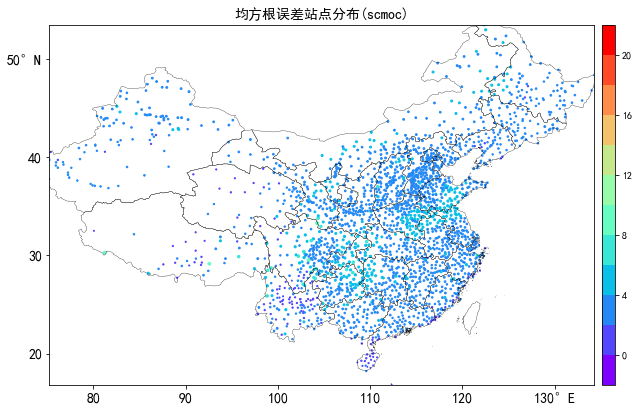

最大值位于
id:56434   lon:97.47  lat:28.65 value:20.523933


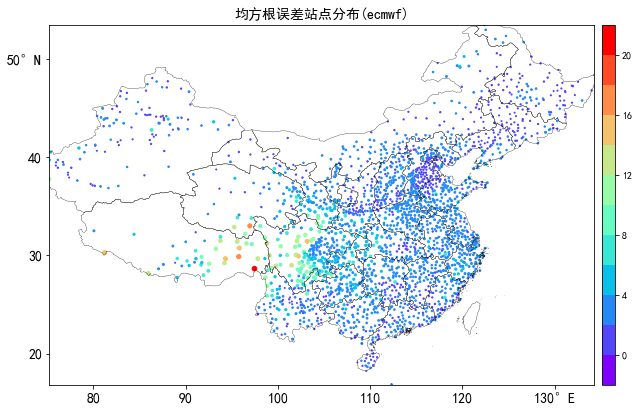

最大值位于
id:56263   lon:101.88  lat:30.88 value:17.699448


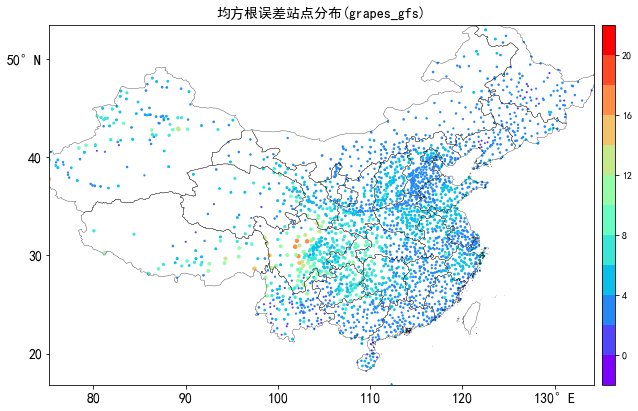

In [6]:
mpd.rmse_scatter(tmax_all)

最大值位于
id:56385   lon:103.33  lat:29.52 value:10.302108


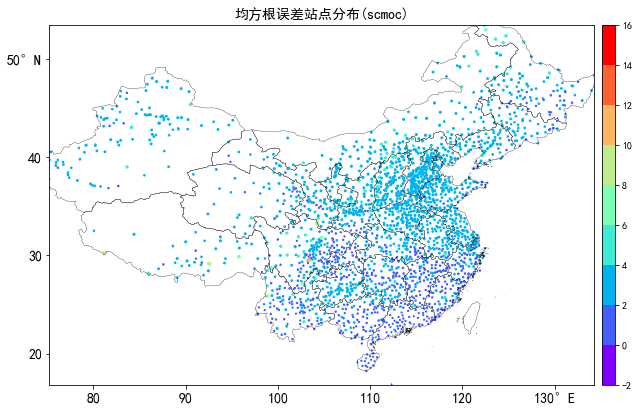

最大值位于
id:56018   lon:95.28  lat:32.88 value:15.811792


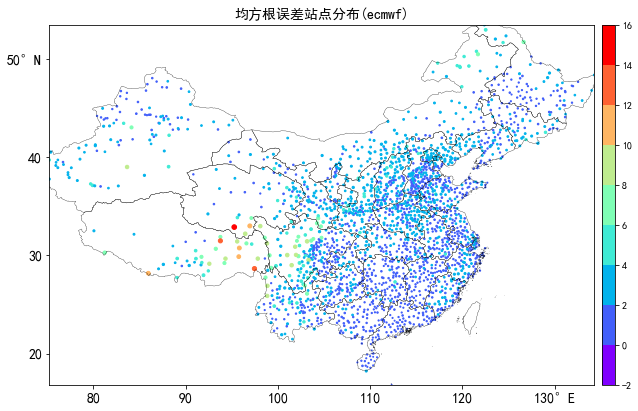

最大值位于
id:56673   lon:102.92  lat:26.92 value:14.528322


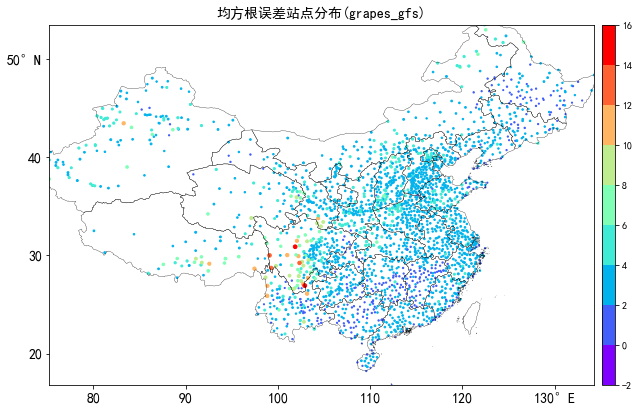

In [7]:
mpd.rmse_scatter(tmin_all)

In [8]:
tmax_on_ob = meb.between_ob_time_range(tmax_all,week_ago,now)
tmax_on_fo = meb.between_time_range(tmax_on_ob,tweek_ago,week_ago)
result1 = mpd.score(tmax_on_fo,mem.rmse,g = "dtime")

In [9]:
tmin_on_ob = meb.between_ob_time_range(tmin_all,week_ago,now)
tmin_on_fo = meb.between_time_range(tmin_on_ob,tweek_ago,week_ago)
result2 = mpd.score(tmin_on_fo,mem.rmse,g = "dtime")

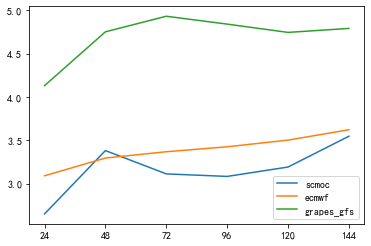

In [10]:
data_names = meb.get_stadata_names(tmax_on_ob)
for i in range(len(data_names)-1):
    plt.plot(result1[1],result1[0][:,i],label = data_names[i+1])
plt.xticks(result1[1])
plt.legend()

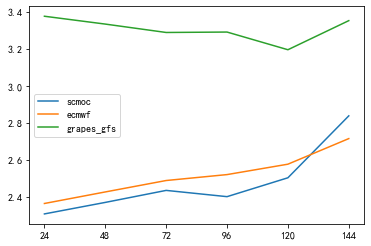

In [11]:
data_names = meb.get_stadata_names(tmax_on_ob)
for i in range(len(data_names)-1):
    plt.plot(result2[1],result2[0][:,i],label = data_names[i+1])
plt.xticks(result2[1])
plt.legend()

最大值位于
id:56097   lon:104.25  lat:33.27 value:10.123105


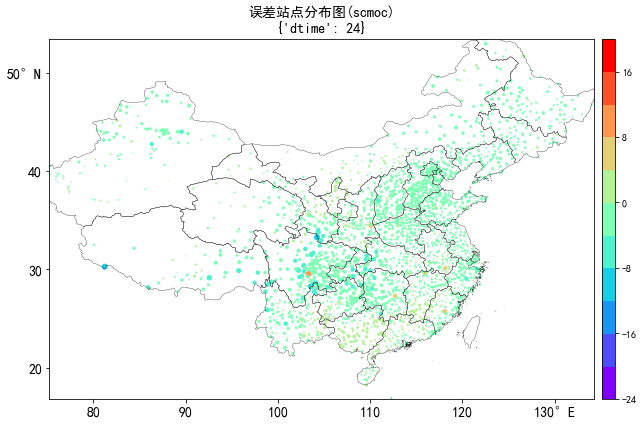

最大值位于
id:56434   lon:97.47  lat:28.65 value:20.1399


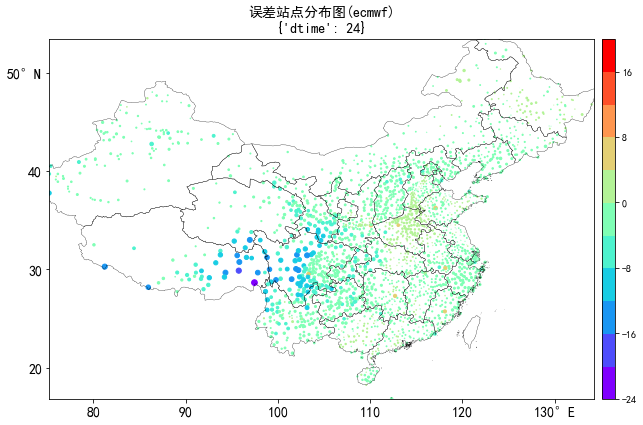

最大值位于
id:56263   lon:101.88  lat:30.88 value:17.146189


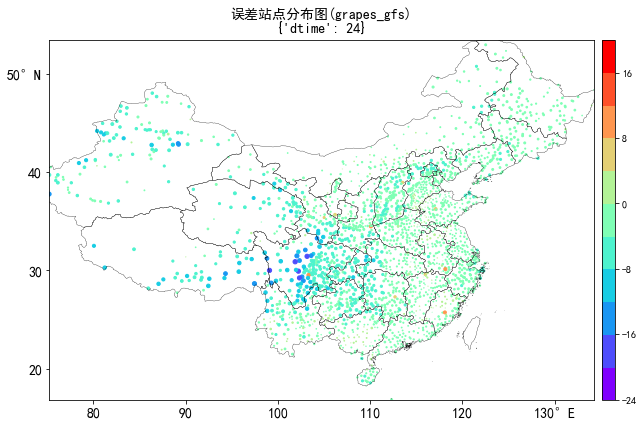

In [12]:
mpd.me_scatter(tmax_all,s = {"dtime":24})